In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import classification_report, scorer, precision_score, recall_score

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [4]:
os.chdir('/Users/Weiyang/Desktop/Git/Assignment/Assignment3/Data')

In [5]:
dataset = pd.read_csv('student-mat.csv', delimiter = ';')

### Inspecting Data

In [6]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [7]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n",dataset.nunique())

Rows     :  395
Columns  :  33

Features : 
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Missing values :   0

Unique values :  
 school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64


### Data Manipulation

In [8]:
def unique_counts(dataset):
    for i in dataset.columns:
        count = dataset[i].nunique()
        print('There are {} unique values in {}.'.format(count, i))

In [9]:
unique_counts(dataset)

There are 2 unique values in school.
There are 2 unique values in sex.
There are 8 unique values in age.
There are 2 unique values in address.
There are 2 unique values in famsize.
There are 2 unique values in Pstatus.
There are 5 unique values in Medu.
There are 5 unique values in Fedu.
There are 5 unique values in Mjob.
There are 5 unique values in Fjob.
There are 4 unique values in reason.
There are 3 unique values in guardian.
There are 4 unique values in traveltime.
There are 4 unique values in studytime.
There are 4 unique values in failures.
There are 2 unique values in schoolsup.
There are 2 unique values in famsup.
There are 2 unique values in paid.
There are 2 unique values in activities.
There are 2 unique values in nursery.
There are 2 unique values in higher.
There are 2 unique values in internet.
There are 2 unique values in romantic.
There are 5 unique values in famrel.
There are 5 unique values in freetime.
There are 5 unique values in goout.
There are 5 unique values i

In [10]:
binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [11]:
numeric_variables = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'goout', 'health', 'absences']

In [12]:
categorical_variables = ['Fjob', 'Mjob', 'reason', 'guardian']

### Copying Dataset out

In [13]:
sample_dataset = dataset.copy()
sample_dataset1 = dataset.copy()

### Data Pre-processing

In [14]:
not_interested = ['G1', 'G2', 'G3']

In [15]:
interested = [col for col in dataset.columns if col not in not_interested]

In [16]:
new_dataset = dataset[interested]

In [17]:
y_values = dataset['G3']

### Label Encoding

In [18]:
from collections import defaultdict
d1 = defaultdict(LabelEncoder)
d2 = defaultdict(LabelEncoder)

In [19]:
bin_values = new_dataset[binary_variables]

In [20]:
cat_values = new_dataset[categorical_variables]

In [21]:
new_cat_values = pd.get_dummies(cat_values)

In [22]:
num_values = new_dataset[numeric_variables]

In [23]:
bin_fit = bin_values.apply(lambda x: d1[x.name].fit_transform(x))

In [24]:
final_dataset = pd.concat([num_values, bin_fit, new_cat_values], axis = 1)

### Creating Categorical Output

In [25]:
y_labels = []

for i in y_values:
    if i >= y_values.median():
        y_labels.append(1)
    else:
        y_labels.append(0)

#### Feature Scaling using Min-Max

In [26]:
x = final_dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ready_data = pd.DataFrame(x_scaled,columns=final_dataset.columns)

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(ready_data, y_labels, test_size = 0.33, random_state = 777)

In [28]:
print(x_train.shape)

(264, 43)


In [29]:
print(x_test.shape)

(131, 43)


## k-Nearest Neighbors (With Feature Scaling)

In [30]:
model = KNeighborsClassifier(n_jobs = -1)

In [31]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
prediction = model.predict(x_test)

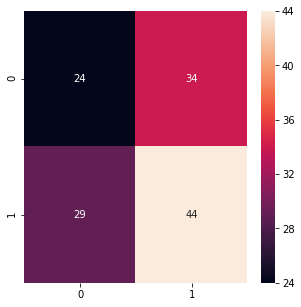

In [33]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True, fmt="d")

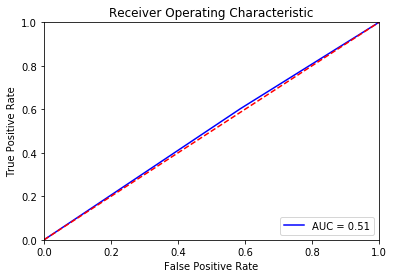

In [34]:
y_pred = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_curve)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
score = round(accuracy_score(y_test, prediction),2)
print('Accuracy of Base Model: {} '.format(score))

Accuracy of Base Model: 0.52 


### Running Hyper-parameter Tuning to find Global Optimum

In [36]:
model = KNeighborsClassifier(n_jobs=-1)

In [37]:
k = np.arange(1,41)

In [38]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}

In [39]:
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

In [40]:
model1.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'leaf_size': [1, 2, 3, 5], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}


In [42]:
prediction=model1.predict(x_test)

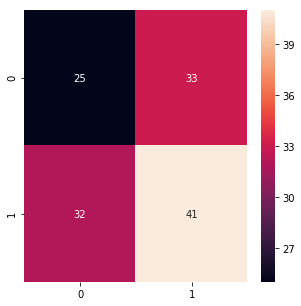

In [43]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True, fmt="d")

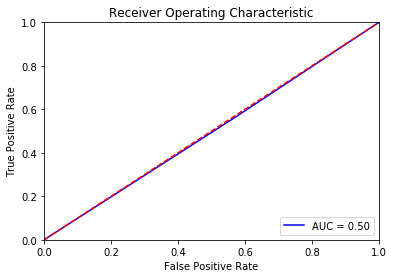

In [44]:
y_pred = model1.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_curve)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
score = round(accuracy_score(y_test, prediction),2)
print('Accuracy of Base Model: {} '.format(score))

Accuracy of Base Model: 0.5 


### Changing the Number of Neighbors

#### Using Mean Error as Metric

In [46]:
test_error = []
train_error = []

# Calculating error for K values between 1 and 40
for i in range(1, 41):  
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)
    knn_pred = model_knn.predict(x_train)
    train_error.append(np.mean(knn_pred != y_train))
    knn_pred = model_knn.predict(x_test)
    test_error.append(np.mean(knn_pred != y_test))

In [47]:
neighbors = pd.DataFrame()
neighbors['N_neighbors'] = list(range(1,41))
neighbors['Train_Error'] = train_error
neighbors['Test_Error'] = test_error

In [48]:
neighbors.set_index('N_neighbors')

,Train_Error,Test_Error
N_neighbors,,
1,0.000000,0.580153
2,0.219697,0.572519
3,0.257576,0.473282
4,0.291667,0.511450
5,0.268939,0.480916
6,0.303030,0.450382
7,0.306818,0.526718
8,0.367424,0.442748
9,0.356061,0.496183


In [49]:
print('The number of neighbors that gave the lowest error for Training is {}'.format((neighbors.loc[neighbors['Train_Error'].idxmin()][0])))
print('The number of neighbors that gave the lowest error for Testing is {}'.format((neighbors.loc[neighbors['Test_Error'].idxmin()][0])))

The number of neighbors that gave the lowest error for Training is 1.0
The number of neighbors that gave the lowest error for Testing is 36.0


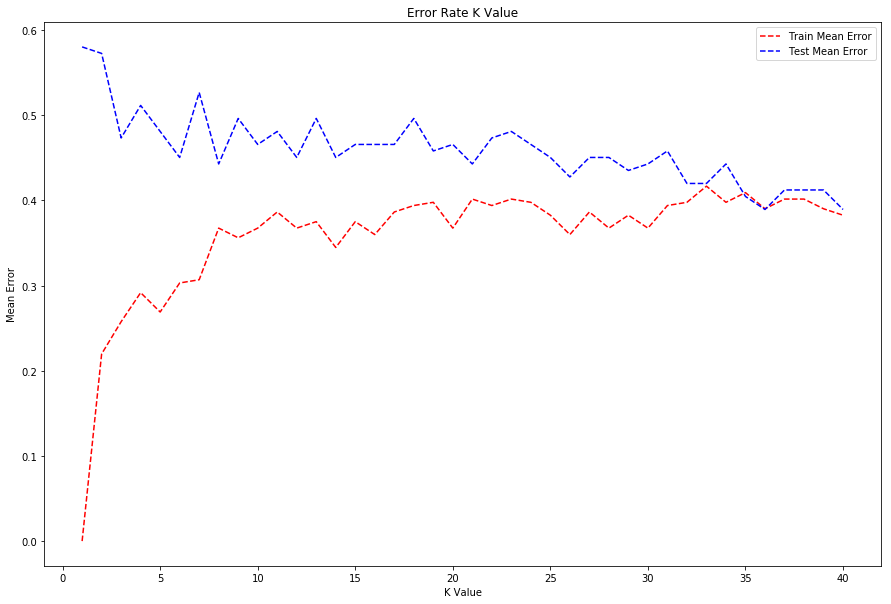

In [50]:
plt.figure(figsize=(15, 10))  
plt.plot(range(1, 41), train_error, color='red', linestyle='dashed',  
         markerfacecolor='red', markersize=10, label='Train Mean Error')
plt.plot(range(1, 41), test_error, color='blue', linestyle='dashed',  
         markerfacecolor='blue', markersize=10, label='Test Mean Error')
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')
plt.legend(loc='best')
plt.show()

#### The point where train mean error = test mean error is at 3 neighbors

#### Using AUC as metric

In [51]:
n_neighbors = list(range(1,41))

In [52]:
train_results = []
test_results = []

for n in n_neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

In [53]:
neighbors['AUC_Train'] = train_results
neighbors['AUC_Test'] = test_results

In [54]:
neighbors.set_index('N_neighbors')

,Train_Error,Test_Error,AUC_Train,AUC_Test
N_neighbors,,,,
1,0.000000,0.580153,1.000000,0.406826
2,0.219697,0.572519,0.786765,0.443788
3,0.257576,0.473282,0.741039,0.513344
4,0.291667,0.511450,0.712776,0.502126
5,0.268939,0.480916,0.729550,0.508266
6,0.303030,0.450382,0.699678,0.558692
7,0.306818,0.526718,0.690257,0.460085
8,0.367424,0.442748,0.633732,0.558455
9,0.356061,0.496183,0.641314,0.491025


In [55]:
print('The number of neighbors that gave the highest AUC for Training is {}'.format((neighbors.loc[neighbors['AUC_Train'].idxmax()][0])))
print('The number of neighbors that gave the highest AUC for Testing is {}'.format((neighbors.loc[neighbors['AUC_Test'].idxmax()][0])))

The number of neighbors that gave the highest AUC for Training is 1.0
The number of neighbors that gave the highest AUC for Testing is 36.0


In [56]:
from matplotlib.legend_handler import HandlerLine2D

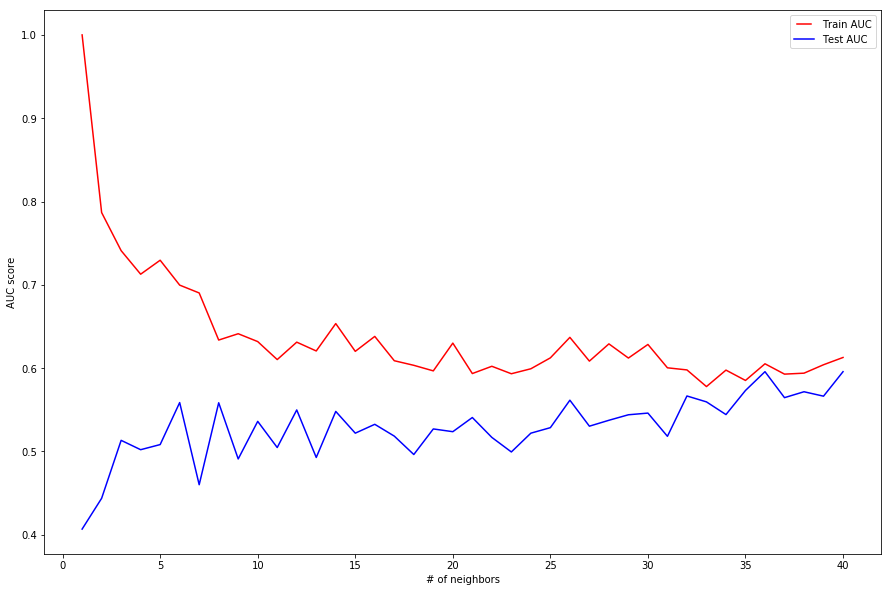

In [57]:
plt.figure(figsize=(15,10))

line1, = plt.plot(n_neighbors, train_results, 'r', label='Train AUC')
line2, = plt.plot(n_neighbors, test_results, 'b', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('# of neighbors')
plt.show()

### Changing Power parameter for the Minkowski metric 

#### Note: When p=1, this is equivalent to using manhattan_distance(l1), and euliddean_distance(l2) for p=2.

In [108]:
distances = [1,2,3,4,5]

In [109]:
train_distance = []
test_distance = []

for p in distances:
    
    model = KNeighborsClassifier(n_neighbors = 36, p=p)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_distance.append(roc_auc)
    
    test_pred = model.predict(x_test)
    fpr_test, tpr_test, thesholds_test = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_distance.append(roc_auc_test)

In [110]:
minkowski_power = pd.DataFrame()
minkowski_power['Power'] = distances
minkowski_power['AUC_Train'] = train_distance
minkowski_power['AUC_Test'] = test_distance
minkowski_power.set_index('Power')

,AUC_Train,AUC_Test
Power,,
1,0.600643,0.588687
2,0.605239,0.595772
3,0.597656,0.557983
4,0.605469,0.542513
5,0.616958,0.557983


In [111]:
print('The power that gave the highest AUC for Training is {}'.format((minkowski_power.loc[minkowski_power['AUC_Train'].idxmax()][0])))
print('The power that gave the highest AUC for Testing is {}'.format((minkowski_power.loc[minkowski_power['AUC_Test'].idxmax()][0])))

The power that gave the highest AUC for Training is 5.0
The power that gave the highest AUC for Testing is 2.0


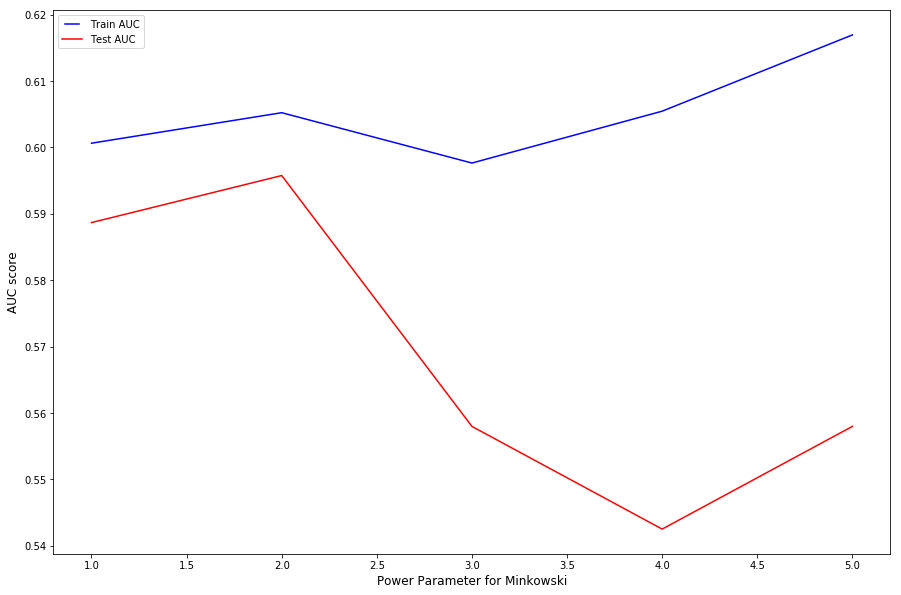

In [112]:
plt.figure(figsize=(15,10))

line1, = plt.plot(distances, train_distance, 'b', label = 'Train AUC')
line2, = plt.plot(distances, test_distance, 'r', label = 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score', size = 12)
plt.xlabel('Power Parameter for Minkowski', size = 12)
plt.show()

### Running Intermediate Model

In [113]:
model_int = KNeighborsClassifier(n_jobs=-1, n_neighbors = 36, p=2)

In [114]:
model_int.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
           weights='uniform')

In [115]:
prediction=model_int.predict(x_test)

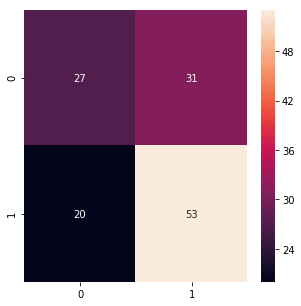

In [116]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True, fmt="d")

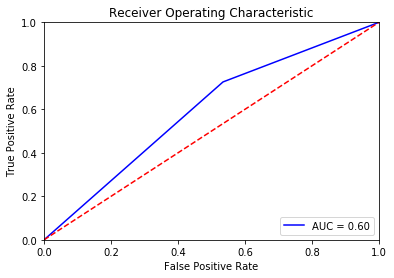

In [117]:
y_pred = model_int.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_curve)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
score = round(accuracy_score(y_test, prediction),2)
print('Accuracy of Base Model: {} '.format(score))

Accuracy of Base Model: 0.61 


### Changing Leaf Size

In [119]:
leaf_size = np.arange(1, 41)

In [120]:
train_leaf = []
test_leaf = []

for i in leaf_size:
    
    model = KNeighborsClassifier(n_neighbors = 36, p=2, leaf_size = i)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_leaf.append(roc_auc)
    
    test_pred = model.predict(x_test)
    fpr_test, tpr_test, thesholds_test = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_leaf.append(roc_auc_test)

In [121]:
change_leaf = pd.DataFrame()
change_leaf['Leaf Size'] = leaf_size
change_leaf['AUC_Train'] = train_leaf
change_leaf['AUC_Test'] = test_leaf
change_leaf.set_index('Leaf Size')

,AUC_Train,AUC_Test
Leaf Size,,
1,0.605239,0.595772
2,0.605239,0.595772
3,0.605239,0.595772
4,0.605239,0.595772
5,0.605239,0.595772
6,0.605239,0.595772
7,0.605239,0.595772
8,0.605239,0.595772
9,0.605239,0.595772


In [122]:
print('The leaf size that gave the highest AUC for Training is {}'.format((change_leaf.loc[change_leaf['AUC_Train'].idxmax()][0])))
print('The leaf size that gave the highest AUC for Testing is {}'.format((change_leaf.loc[change_leaf['AUC_Test'].idxmax()][0])))

The leaf size that gave the highest AUC for Training is 1.0
The leaf size that gave the highest AUC for Testing is 1.0


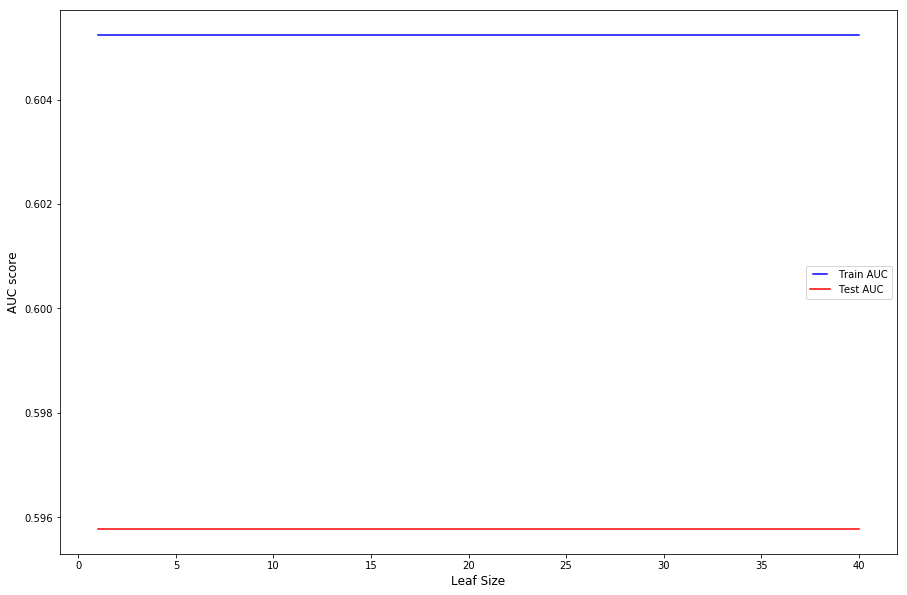

In [123]:
plt.figure(figsize=(15,10))

line1, = plt.plot(leaf_size, train_leaf, 'b', label = 'Train AUC')
line2, = plt.plot(leaf_size, test_leaf, 'r', label = 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score', size = 12)
plt.xlabel('Leaf Size', size = 12)
plt.show()

#### It would seem that leaf size does not affect the AUC for k-NN

### Changing Algorithms

In [124]:
algorithm_list = ['auto', 'ball_tree','kd_tree','brute']

In [125]:
train_algo = []
test_algo = []

for i in algorithm_list:
    
    model = KNeighborsClassifier(n_neighbors = 36, p=2, algorithm=i)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_algo.append(roc_auc)
    
    test_pred = model.predict(x_test)
    fpr_test, tpr_test, thesholds_test = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_algo.append(roc_auc_test)

In [126]:
change_algorithm = pd.DataFrame()
change_algorithm['Algorithm'] = algorithm_list
change_algorithm['AUC_Train'] = train_algo
change_algorithm['AUC_Test'] = test_algo
change_algorithm.set_index('Algorithm')

,AUC_Train,AUC_Test
Algorithm,,
auto,0.605239,0.595772
ball_tree,0.605239,0.595772
kd_tree,0.605239,0.595772
brute,0.605239,0.595772


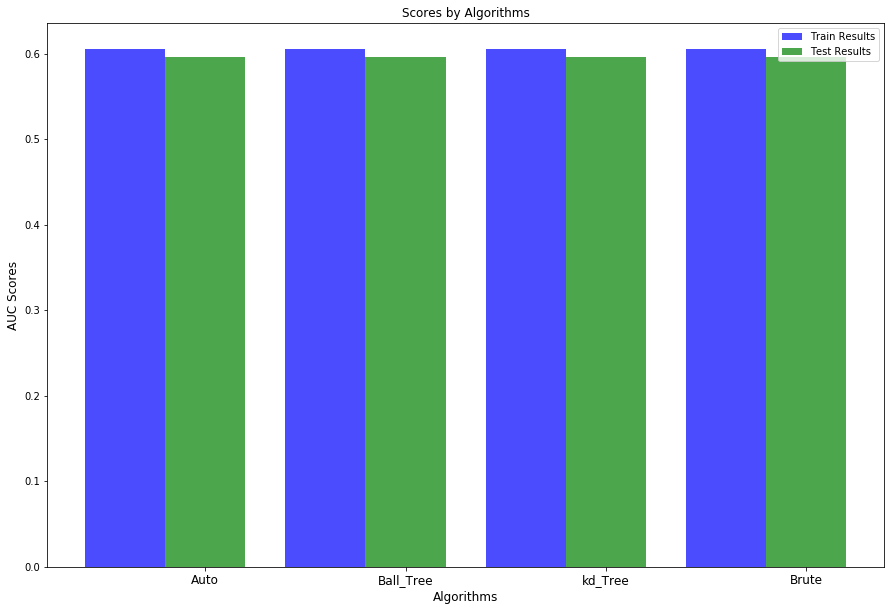

In [127]:
index = np.arange(len(algorithm_list))

fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.4
opacity = 0.7
 
rects1 = plt.bar(index, train_algo, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Train Results')
 
rects2 = plt.bar(index + bar_width, test_algo, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Test Results')

 
plt.xlabel('Algorithms', size = 12)
plt.ylabel('AUC Scores', size = 12)
#plt.ylim(0.6,0.8)
plt.title('Scores by Algorithms')
plt.xticks(index + bar_width, ('Auto', 'Ball_Tree','kd_Tree','Brute'), size = 12)
plt.legend(loc='best')
 
plt.show()

#### It would seem changing Algorithms did not affect the AUC scores

### Changing Learning Size

In [139]:
size = np.linspace(0.15,1,100)

In [140]:
sample_size = x_train.shape[0]*size

In [142]:
training_space = []

for i in sample_size:
    training_space.append(int(i))

In [143]:
test_scores_1 = []
train_scores_1 = []

for i in training_space:

    x_new = x_train.iloc[:i,:]    
    y_new = y_train[:i]
    
    #Model Creation
    model = KNeighborsClassifier(n_neighbors = 36, p=2)
    model.fit(x_new, y_new)
    
    train_pred = model.predict(x_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_scores_1.append(roc_auc)
    
    test_pred = model.predict(x_test)
    fpr_test, tpr_test, thesholds_test = roc_curve(y_test, test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_scores_1.append(roc_auc_test)

In [144]:
change_ls = pd.DataFrame()
change_ls['Training Space'] = training_space
change_ls['AUC_Train'] = train_scores_1
change_ls['AUC_Test'] = test_scores_1
change_ls.set_index('Training Space')

,AUC_Train,AUC_Test
Training Space,,
39,0.500000,0.500000
41,0.525276,0.508385
44,0.512638,0.520312
46,0.510110,0.496457
48,0.500000,0.506613
50,0.501149,0.555621
53,0.516314,0.512754
55,0.533088,0.502598
57,0.494485,0.531767


In [145]:
print('The training size that gave the highest AUC for Training is {}'.format((change_ls.loc[change_ls['AUC_Train'].idxmax()][0])))
print('The training size that gave the highest AUC for Testing is {}'.format((change_ls.loc[change_ls['AUC_Test'].idxmax()][0])))

The training size that gave the highest AUC for Training is 196.0
The training size that gave the highest AUC for Testing is 257.0


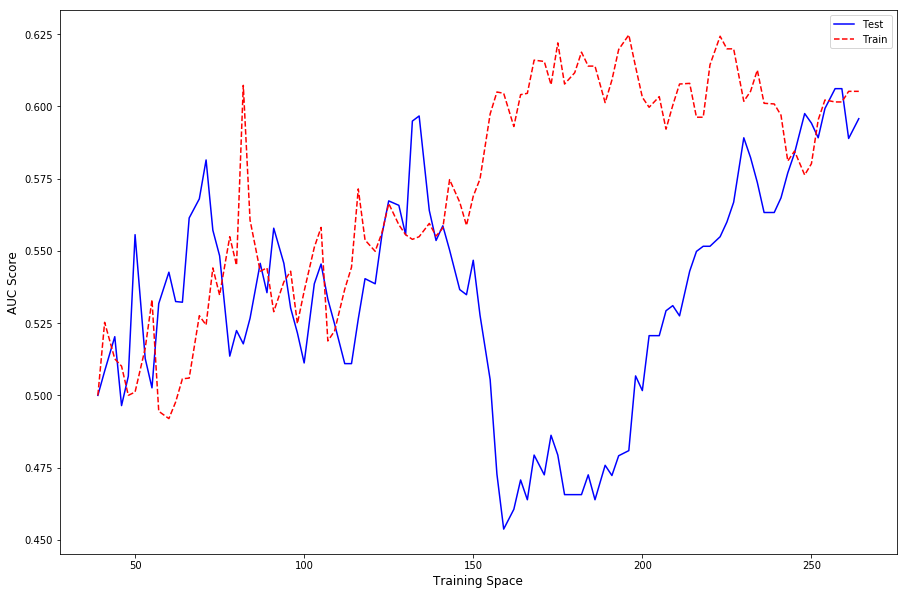

In [146]:
plt.figure(figsize=(15,10))

plt.plot(training_space, test_scores_1, 'b-', label='Test')
plt.plot(training_space, train_scores_1, 'r--', label='Train')

plt.legend(loc='best')
plt.xlabel('Training Space', size = 12)
plt.ylabel('AUC Score', size = 12)
plt.show()

In [192]:
model = KNeighborsClassifier(n_neighbors = 36, p=2)

In [193]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=36, p=2,
           weights='uniform')

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, n_jobs=-1, cv=3, train_sizes=np.linspace(.3, 1.0, 10), verbose=1)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.figure(figsize=(15,10))
    
plt.grid()
    
# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label = 'Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label ="Cross-validation score")
    
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1

plt.title("K-Nearest Neighbors")
plt.legend(loc = 'lower right')
plt.xlabel("Training examples", size =12)
plt.ylabel("Score", size = 12)
plt.ylim(0.5,0.85)
plt.show()

### Final Model

In [228]:
model_final = KNeighborsClassifier(n_jobs=-1, n_neighbors = 36, p=2)

In [229]:
x_new = x_train.iloc[:257,:]    
y_new = y_train[:257]

In [230]:
model_final.fit(x_new, y_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
           weights='uniform')

In [231]:
prediction=model_final.predict(x_test)

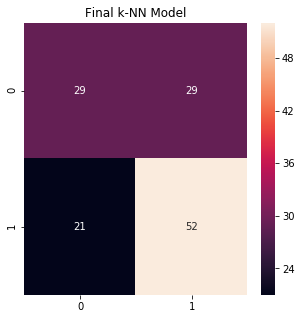

Sensitivity for k-NN:  0.5
Specificity for k-NN:  0.712
F Score for k-NN:  0.675


In [232]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (5,5))
plt.title('Final k-NN Model')
sns.heatmap(cm, annot=True, fmt="d")

plt.show()

sensitivity = round(cm[0,0]/(cm[0,0]+cm[0,1]),3)
print('Sensitivity for k-NN: ', sensitivity )
specificity = round(cm[1,1]/(cm[1,0]+cm[1,1]),3)
print('Specificity for k-NN: ', specificity)
f_score = round(f1_score(y_test, model_final.predict(x_test)),3)
print('F Score for k-NN: ', f_score)

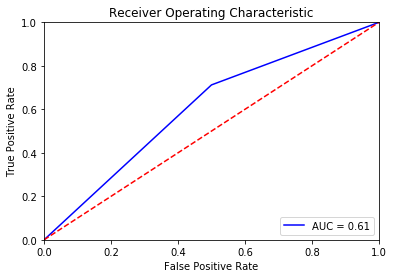

In [179]:
y_pred = model_final.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_curve)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [180]:
score = round(accuracy_score(y_test, prediction),2)
print('Accuracy of Base Model: {} '.format(score))

Accuracy of Base Model: 0.62 


### Visualizing Labels

In [181]:
from sklearn.decomposition import PCA

In [182]:
data1 = x_test.reset_index()

In [183]:
data1 = data1.drop(['index'], axis = 1)

In [184]:
data2 = pd.DataFrame(prediction)

In [185]:
visual_dataset = pd.concat([data1, data2], axis = 1)

In [186]:
visual_dataset.shape

(131, 44)

In [187]:
model_visuals = PCA(n_components = 3)

In [188]:
model_visuals.fit(x_test)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [189]:
X_3D = model_visuals.transform(x_test)

In [190]:
from mpl_toolkits.mplot3d import Axes3D

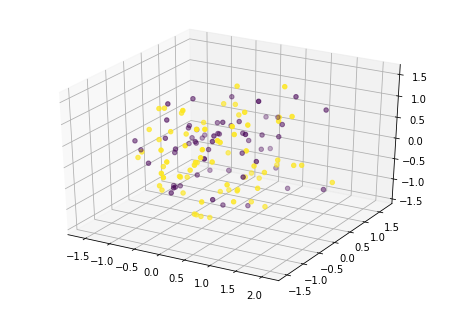

In [191]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs = X_3D[:,1], ys = X_3D[:,0], zs=X_3D[:,2], zdir='z', c = visual_dataset.iloc[:,28])
plt.show()

In [210]:
data11 = x_test.reset_index()

In [211]:
data11 = data11.drop(['index'], axis = 1)

In [212]:
data21 = pd.DataFrame(prediction)

In [213]:
data22 = pd.DataFrame(y_test)

In [214]:
visual_dataset1 = pd.concat([data11, data22, data21], axis = 1)

In [215]:
model_visuals1 = PCA(n_components = 2)

In [216]:
model_visuals1.fit(x_test)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [217]:
X_2D = model_visuals1.transform(x_test)

In [221]:
X_2D = pd.DataFrame(X_2D)

In [218]:
visual_dataset1.columns = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'goout', 'health', 'absences', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'actual', 'predicted']

In [223]:
visual_dataset1 = pd.concat([visual_dataset1, X_2D], axis = 1)

In [225]:
visual_dataset1.columns = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'goout', 'health', 'absences', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'actual', 'predicted', 'PCA1', 'PCA2']

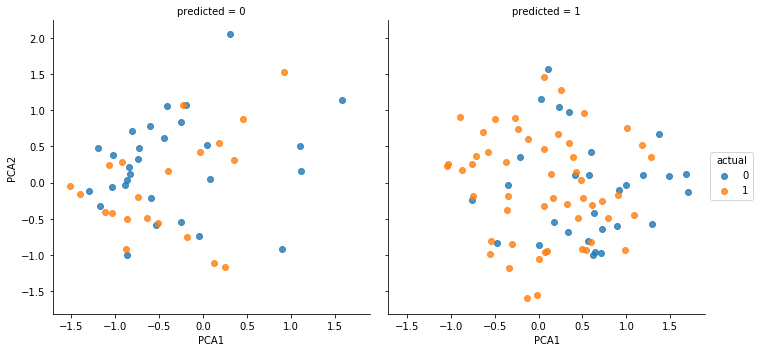

In [227]:
sns.lmplot('PCA1', 'PCA2', data=visual_dataset1, hue='actual',col='predicted', fit_reg=False, palette='tab10')